In [35]:
import pandas as pd
import numpy as np

In [36]:
train_df = pd.read_csv('..\data\processed/train_data_processed.csv')
validation_df = pd.read_csv('..\data\processed/validation_data_processed.csv')

In [3]:
train_df

,demog_1,demog_3,city_tier,occupation,demog_4,demog_9,demog_15,demog_20,demog_21,others_1,...,demog_23,demog_24,demog_32,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month,Target
0,53.0,101.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,...,168.0,7481.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0
1,55.0,101.0,1.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,...,185.0,17461.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
2,55.0,101.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,239.0,8788.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0
3,53.0,101.0,7.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,...,127.0,7065.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,55.0,101.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,...,200.0,8617.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96330,55.0,101.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,49.0,7299.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
96331,55.0,101.0,0.0,6.0,0.0,1.0,1.0,1.0,0.0,1.0,...,9.0,9089.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,1
96332,55.0,101.0,6.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,23.0,9629.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1
96333,55.0,101.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,106.0,8487.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1


In [56]:
train_df['Target'].value_counts()

Target
0    94335
1     2000
Name: count, dtype: int64

In [34]:
# SFS_xgb = ['country_code','demog_6','demog_7','demog_9','demog_11','demog_12','demog_14','demog_15','demog_16','demog_19','demog_21','others_5','others_9','others_12','others_14','others_18','others_19','others_20','others_21','others_23','others_24','others_27','demog_23','demog_25','demog_27','demog_28','demog_29','demog_31','demog_34','demog_35','demog_37','demog_38','others_33','others_36','others_38','others_40','others_41','demog_39','email_domain','demog_40','demog_41','demog_42','account_opening_month']
# SFS_rf = ['demog_1','city_tier','occupation','demog_5','demog_21','others_1','others_2','others_5','others_7','others_9','others_11','others_23','others_25','others_26','demog_23','demog_26','demog_32','others_36','email_domain','demog_40','account_opening_month','account_opening_year']

In [5]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['Target']),train_df['Target'] , test_size=0.2, random_state=42, stratify=train_df['Target'])



In [58]:
X_train

,demog_1,demog_3,city_tier,occupation,demog_4,demog_9,demog_15,demog_20,demog_21,others_1,...,others_26,demog_23,demog_24,demog_32,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month
58375,55.0,101.0,8.0,6.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,18.000000,174.0,8075.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0
87620,55.0,101.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,...,1.000000,237.0,7886.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
31532,55.0,101.0,2.0,5.0,0.000000,0.0,0.0,1.0,1.0,0.0,...,25.603833,243.0,15699.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0
26733,53.0,101.0,3.0,4.0,0.061674,0.0,0.0,0.0,0.0,0.0,...,92.000000,367.0,17838.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
64576,55.0,101.0,1.0,4.0,0.000000,1.0,1.0,0.0,0.0,0.0,...,0.000000,245.0,9049.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69800,55.0,101.0,8.0,4.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,2.000000,158.0,7665.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
95061,401.0,101.0,8.0,5.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,42.000000,27.0,10509.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0
17662,55.0,101.0,7.0,6.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,3.000000,149.0,11484.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
21656,55.0,101.0,7.0,4.0,0.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,236.0,10726.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## XGBoost

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Initialize the XGBoost classifier
model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [39]:
threshold = 0.1
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_threshold, average='macro')
print(f'F1-Score on Validation Set: {f1:.4f}')

F1-Score on Validation Set: 0.9272


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


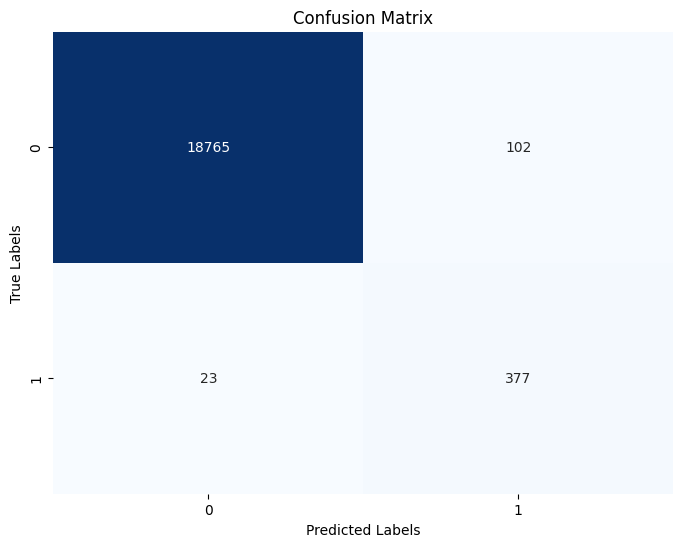

In [40]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## hyperparameter tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Assuming X_train and y_train are your training data and target

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier with GPU support
xgb_model = XGBClassifier(
    tree_method='gpu_hist',   # Use GPU acceleration
    predictor='gpu_predictor',
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Define StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the RandomizedSearchCV with f1 score as the scoring metric
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    scoring='f1_macro',
    n_iter=50,  # Number of parameter settings that are sampled
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best F1 Score: ", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\sarth\anaconda3\envs\fraud_detection\lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\sarth\anaconda3\envs\fraud_detection\lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best F1 Score:  0.9447545061218519


F1-Score on Validation Set: 0.9347


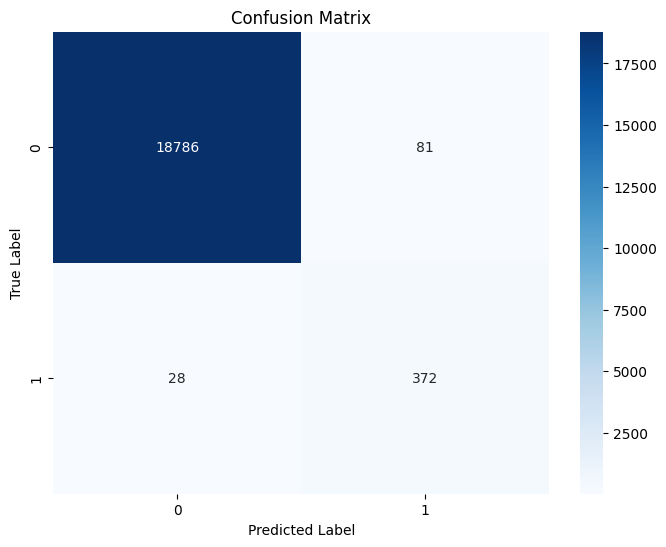

In [83]:
# After running the RandomizedSearchCV and obtaining the best model
best_xgb_model = random_search.best_estimator_

# Adjusting the decision threshold
## threshold for transaction to be non fradulent i.e. if threshold = 1 all transactions are non fradulent
threshold = 0.3
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_threshold, average='macro')
print(f'F1-Score on Validation Set: {f1:.4f}')

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Anomoly Detection

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [105]:
train_df

,demog_1,demog_3,city_tier,occupation,demog_4,demog_9,demog_15,demog_20,demog_21,others_1,...,demog_23,demog_24,demog_32,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month,Target
0,53.0,101.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,...,168.0,7481.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0
1,55.0,101.0,1.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,...,185.0,17461.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
2,55.0,101.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,239.0,8788.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0
3,53.0,101.0,7.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,...,127.0,7065.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,55.0,101.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,...,200.0,8617.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96330,55.0,101.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,49.0,7299.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
96331,55.0,101.0,0.0,6.0,0.0,1.0,1.0,1.0,0.0,1.0,...,9.0,9089.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,1
96332,55.0,101.0,6.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,23.0,9629.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1
96333,55.0,101.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,106.0,8487.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1


In [106]:
X = train_df.drop(columns=['Target'])
y = train_df['Target']

train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=21
)

In [107]:
train_data

,demog_1,demog_3,city_tier,occupation,demog_4,demog_9,demog_15,demog_20,demog_21,others_1,...,others_26,demog_23,demog_24,demog_32,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month
1317,55.0,101.0,8.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,...,10.0,224.0,9339.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
16976,55.0,101.0,8.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,...,24.0,193.0,8121.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0
32165,55.0,101.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,196.0,9712.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
43034,55.0,101.0,1.0,5.0,0.0,1.0,1.0,1.0,1.0,1.0,...,36.0,242.0,8798.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
16999,55.0,101.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,...,62.0,183.0,8251.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81968,401.0,101.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,104.0,194.0,10696.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0
8964,53.0,101.0,8.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,237.0,10663.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
71480,55.0,101.0,1.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,227.0,9941.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
70863,55.0,101.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,152.0,7871.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0


In [108]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming train_data and test_data are Pandas DataFrames
scaler = StandardScaler()

# Fit the scaler on the training data
train_data = pd.DataFrame(scaler.fit_transform(train_data), 
                                 index=train_data.index, 
                                 columns=train_data.columns)

# Transform the test data using the same scaler, ensuring no reindexing occurs
test_data = pd.DataFrame(scaler.transform(test_data), 
                                index=test_data.index, 
                                columns=test_data.columns)


In [109]:
train_data

,demog_1,demog_3,city_tier,occupation,demog_4,demog_9,demog_15,demog_20,demog_21,others_1,...,others_26,demog_23,demog_24,demog_32,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month
1317,-0.274015,-0.061763,1.581262,0.111139,-0.107191,-0.802067,0.530343,1.302235,1.899026,1.299235,...,-0.127464,0.117936,-0.533617,-0.778807,-0.983221,-0.265981,-0.348163,0.025510,0.723185,-1.215662
16976,-0.274015,-0.061763,1.581262,0.111139,-0.107191,1.246779,0.530343,1.302235,1.899026,1.299235,...,-0.013514,-0.074497,-0.852727,-0.778807,-0.983221,3.759669,-0.348163,1.565091,0.723185,0.566812
32165,-0.274015,-0.061763,-1.113294,-2.374934,-0.107191,-0.802067,0.530343,-0.767910,-0.526586,-0.769684,...,-0.200718,-0.055874,-0.435892,1.284031,-0.983221,-0.265981,-0.348163,0.025510,-1.544891,0.566812
43034,-0.274015,-0.061763,-0.776475,0.732657,-0.107191,1.246779,0.530343,1.302235,1.899026,1.299235,...,0.084158,0.229671,-0.675356,-0.778807,-0.983221,-0.265981,-0.348163,-1.514072,0.723185,-1.215662
16999,-0.274015,-0.061763,-0.776475,-1.131898,-0.107191,-0.802067,0.530343,1.302235,1.899026,1.299235,...,0.295781,-0.136572,-0.818667,1.284031,1.017066,-0.265981,-0.348163,1.565091,0.723185,-0.324425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81968,3.594624,-0.061763,0.907623,0.732657,-0.107191,-0.802067,-1.885573,-0.767910,-0.526586,-0.769684,...,0.637632,-0.068289,-0.178089,-0.778807,1.017066,3.759669,-0.348163,0.025510,-0.410853,0.566812
8964,-0.296377,-0.061763,1.581262,0.732657,-0.107191,-0.802067,0.530343,1.302235,-0.526586,1.299235,...,-0.208857,0.198633,-0.186735,1.284031,-0.983221,-0.265981,-0.348163,0.025510,-0.410853,-1.215662
71480,-0.274015,-0.061763,-0.776475,0.111139,-0.107191,1.246779,0.530343,1.302235,1.899026,1.299235,...,-0.208857,0.136558,-0.375895,-0.778807,-0.983221,-0.265981,-0.348163,0.025510,0.723185,-1.215662
70863,-0.274015,-0.061763,0.570804,0.111139,-0.107191,-0.802067,0.530343,-0.767910,-0.526586,-0.769684,...,-0.208857,-0.329005,-0.918226,1.284031,-0.983221,-0.265981,-0.348163,0.025510,-0.410853,1.458049


In [112]:
'''You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as 1. 
Separate the normal rhythms from the abnormal rhythms.'''



normal_train_data = train_data[~y.astype(bool)]
normal_test_data = test_data[~y.astype(bool)]

anomalous_train_data = train_data[y.astype(bool)]
anomalous_test_data = test_data[y.astype(bool)]

C:\Users\sarth\AppData\Local\Temp\ipykernel_69936\1399776350.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normal_train_data = train_data[~y.astype(bool)]
C:\Users\sarth\AppData\Local\Temp\ipykernel_69936\1399776350.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normal_test_data = test_data[~y.astype(bool)]
C:\Users\sarth\AppData\Local\Temp\ipykernel_69936\1399776350.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomalous_train_data = train_data[y.astype(bool)]
C:\Users\sarth\AppData\Local\Temp\ipykernel_69936\1399776350.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomalous_test_data = test_data[y.astype(bool)]


In [111]:
len(test_labels)

19267

In [115]:
normal_test_data

,demog_1,demog_3,city_tier,occupation,demog_4,demog_9,demog_15,demog_20,demog_21,others_1,...,others_26,demog_23,demog_24,demog_32,others_36,others_39,email_domain,demog_40,demog_43,account_opening_month
68957,-0.274015,0.303636,-0.102835,-0.510379,10.333977,-0.802067,-1.885573,-0.767910,-0.526586,-0.769684,...,-0.000459,-0.031044,3.842753,-0.778807,1.017066,-0.265981,-0.348163,-1.514072,0.723185,0.566812
45074,-0.274015,-0.061763,-0.439655,-1.131898,-0.107191,1.246779,0.530343,1.302235,1.899026,1.299235,...,-0.037931,0.211048,-0.025084,1.284031,1.017066,3.759669,-0.348163,1.565091,-0.410853,-1.215662
86422,-0.274015,-0.061763,-0.776475,0.111139,-0.107191,1.246779,0.530343,-0.767910,-0.526586,-0.769684,...,-0.200718,0.223463,-0.524709,1.284031,-0.983221,-0.265981,2.872219,0.025510,0.723185,-1.215662
39237,-0.274015,-0.061763,-0.776475,-1.131898,-0.107191,-0.802067,-1.885573,-0.767910,-0.526586,-0.769684,...,-0.184439,-0.484192,-0.575274,-0.778807,1.017066,-0.265981,2.872219,0.025510,0.723185,1.458049
78683,-0.274015,-0.061763,-1.113294,0.111139,-0.107191,1.246779,0.530343,1.302235,1.899026,1.299235,...,-0.208857,-0.055874,-0.441656,-0.778807,-0.983221,-0.265981,-0.348163,0.025510,-0.410853,0.566812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19054,-0.296377,-0.061763,-0.439655,0.732657,-0.107191,1.246779,0.530343,1.302235,-0.526586,1.299235,...,0.279502,-0.260722,0.081024,1.284031,1.017066,-0.265981,-0.348163,1.565091,0.723185,-0.324425
93334,-0.274015,-0.061763,0.907623,0.111139,-0.107191,1.246779,0.530343,-0.767910,-0.526586,-0.769684,...,-0.168161,-0.074497,-0.269001,-0.778807,1.017066,-0.265981,-0.348163,0.025510,0.723185,0.566812
92037,-0.274015,-0.061763,0.907623,-1.131898,-0.107191,-0.802067,0.530343,-0.767910,-0.526586,-0.769684,...,-0.208857,-0.117949,0.634620,1.284031,-0.983221,-0.265981,2.872219,0.025510,0.723185,0.566812
72601,-0.274015,-0.061763,1.581262,0.111139,-0.107191,-0.802067,0.530343,-0.767910,-0.526586,-0.769684,...,-0.192579,0.254501,-0.397903,1.284031,-0.983221,-0.265981,-0.348163,1.565091,-0.410853,-1.215662


In [116]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(35, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [117]:
# Ensure the model is compiled correctly before fitting
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder model
history = autoencoder.fit(
    normal_train_data, normal_train_data,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_data),
    shuffle=True
)


Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0488 - val_loss: 0.8935
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9329 - val_loss: 0.8024
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7041 - val_loss: 0.7659
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7617 - val_loss: 0.7500
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6508 - val_loss: 0.7378
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6412 - val_loss: 0.7306
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6256 - val_loss: 0.7259
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6380 - val_loss: 0.7220
Epoch 9/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6465 - val_loss: 0.7186
Epoch 10/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6784 - val_loss: 0.7164
Epoch 11/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6548 - val_loss: 0.7138
Epoch 12/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

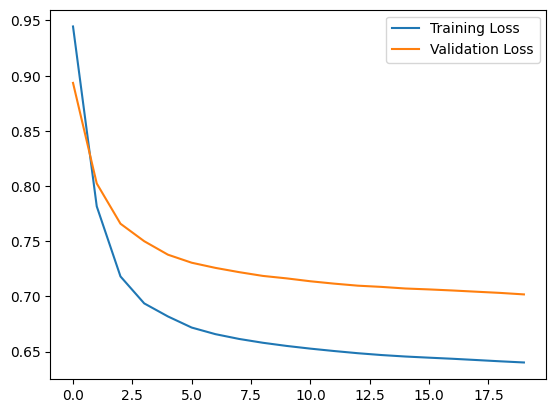

In [118]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [119]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

In [120]:
len(decoded_data[0])

35

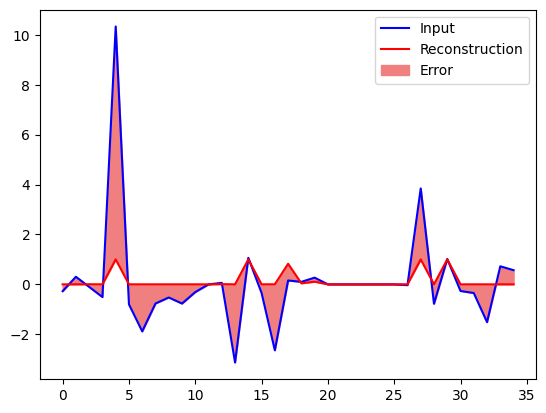

In [121]:
plt.plot(normal_test_data.iloc[0,:].to_numpy(), 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(35), decoded_data[0], normal_test_data.iloc[0,:].to_numpy(), color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

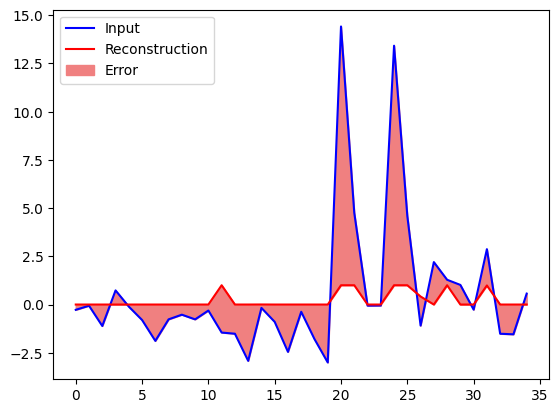

In [122]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data.iloc[0,:].to_numpy(), 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(35), decoded_data[0], anomalous_test_data.iloc[0,:].to_numpy(), color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

2358/2358 ━━━━━━━━━━━━━━━━━━━━ 2s 740us/step


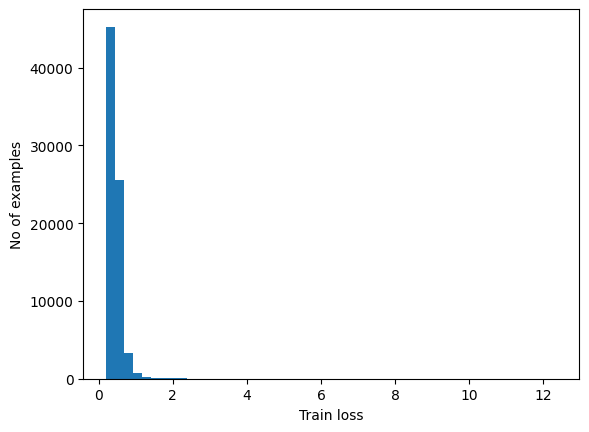

In [123]:
'''Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold.
In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if
the reconstruction error is higher than one standard deviation from the training set.'''

reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [124]:
#Choose a threshold value that is one standard deviations above the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.6170953816392359


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


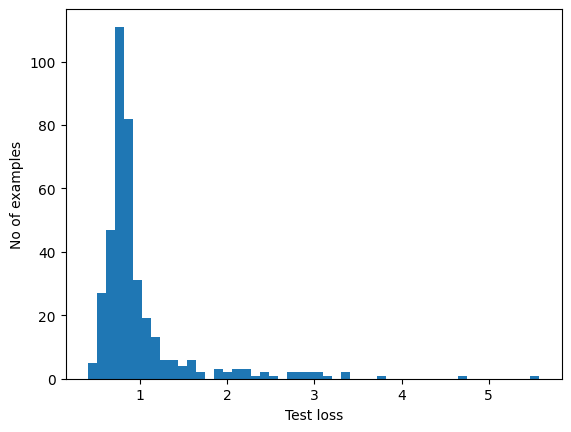

In [125]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [130]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  print("F1 Score = {}".format(f1_score(labels, predictions)))
  
preds = predict(autoencoder, test_data, threshold)
print_stats(~preds, test_labels)

Accuracy = 0.9095863393366896
Precision = 0.17199612403100775
Recall = 0.9149484536082474
F1 Score = 0.2895595432300163
